In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset = df.drop(['Ticket', 'Embarked', 'Cabin', 'PassengerId'], axis=1).dropna()
dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if x=='male' else 1)
print(dataset.shape)
dataset.head()

(714, 8)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500


In [5]:
# x = dataset.drop(['Survived', 'Name'], axis=1).values
# y = dataset['Survived'].values

# component = 3
# pca = PCA(n_components=component)
# x_pca = pca.fit_transform(x)
# # dataset['PCA1'] = x_pca[:, 0]
# # dataset['PCA2'] = x_pca[:, 1]
# # dataset['PCA3'] = x_pca[:, 2]

# x_train, x_test, y_train, y_test = train_test_split(x_pca, y) # Default test size is 25%

# x_train = x_train[:, :component]
# x_test = x_test[:, :component]
# # dataset
# print(x_train.shape)
# print(x_test.shape)

In [6]:
x = dataset.drop(['Survived', 'Name'], axis=1).values
y = dataset['Survived'].values


x_train, x_test, y_train, y_test = train_test_split(x, y) # Default test size is 25%

# dataset
print(x_train.shape)
print(x_test.shape)

(535, 6)
(179, 6)


# k-NN 

In [269]:
model = KNeighborsClassifier(n_neighbors=35)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(f'Accuracy score : {accuracy_score(y_test, y_predict)*100:.2f}%')
#  65.92%
# 69.27% 25% test size no pca

Accuracy score : 69.83%


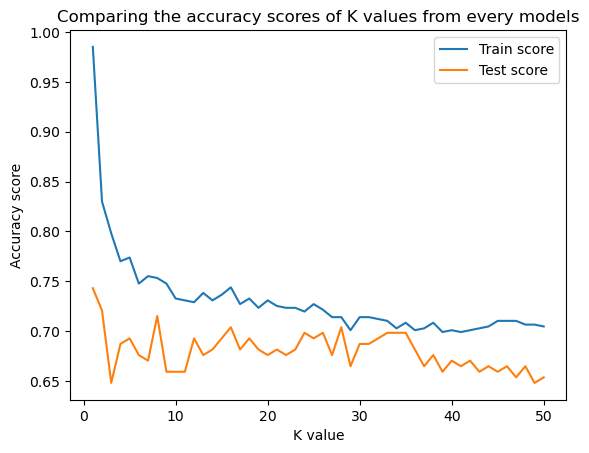

In [270]:
k_neighbors = np.arange(1, 51)
train_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))
for i, K in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    train_score[i] = knn.score(x_train, y_train)
    test_score[i] = knn.score(x_test, y_test)

plt.title("Comparing the accuracy scores of K values from every models")
plt.plot(k_neighbors, train_score, label="Train score")
plt.plot(k_neighbors, test_score, label="Test score")
plt.xlabel("K value")
plt.ylabel("Accuracy score")
plt.legend()
plt.show()


In [271]:
# cross validation scores
scores = cross_val_score(model, x, y, cv=5)
scores

array([0.55944056, 0.76223776, 0.71328671, 0.72027972, 0.69014085])

[[92 31]
 [23 33]]


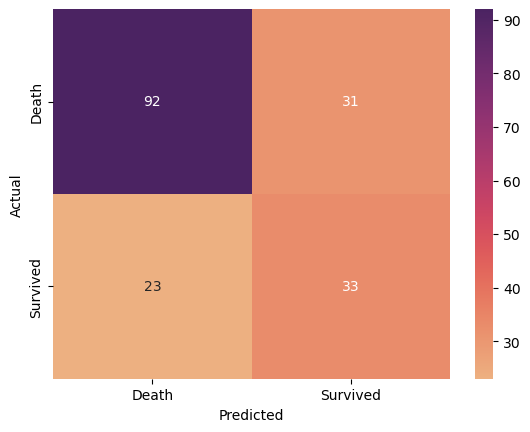

In [272]:
# Confusion matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)
sns.heatmap(cm, annot=True,
            cmap='flare',
            xticklabels=['Death','Survived'],
            yticklabels=['Death','Survived'])
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.show()

In [277]:
print(f"Accuracy: {accuracy_score(y_test, y_predict):.2f}")

Accuracy: 0.70


# Gaussian naive bayes

In [16]:
model = GaussianNB()
model.fit(x_train, y_train)

y_test = y_test.reshape(-1, 1)
y_pred = model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.79


[[94 20]
 [19 46]]


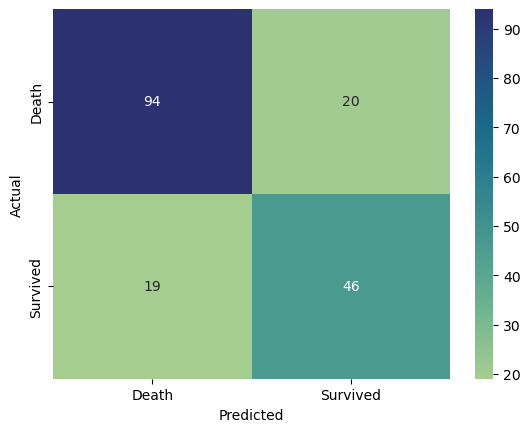

In [24]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True,
            cmap='crest',
            xticklabels=['Death','Survived'],
            yticklabels=['Death','Survived'])
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.show()

## SGD (Stochastic Gradient Descent)

In [19]:
model = SGDClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

Accuracy: 0.78


[[94 20]
 [19 46]]


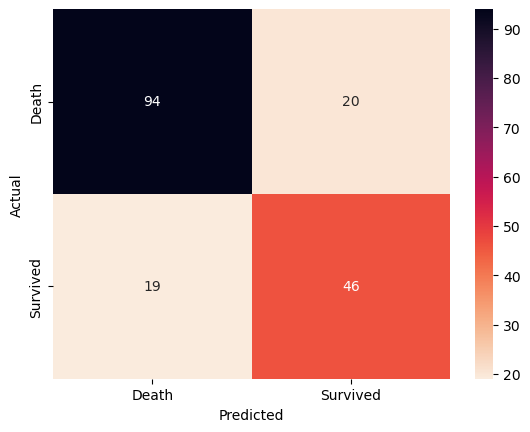

In [27]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True,
            cmap='rocket_r',
            xticklabels=['Death','Survived'],
            yticklabels=['Death','Survived'])
plt.ylabel("Actual")
plt.xlabel("Predicted")

plt.show()